<a href="https://colab.research.google.com/github/Snee21/Google-colab-projects/blob/main/handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print('Training data shape:', x_train.shape)
print('Test data shape:', x_test.shape)


11490434/11490434 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [ ]:
# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input image
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each digit)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2602 - accuracy: 0.9252 - val_loss: 0.1485 - val_accuracy: 0.9543
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1138 - accuracy: 0.9664 - val_loss: 0.1012 - val_accuracy: 0.9674
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0775 - accuracy: 0.9769 - val_loss: 0.0873 - val_accuracy: 0.9725
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0590 - accuracy: 0.9816 - val_loss: 0.0774 - val_accuracy: 0.9762
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0452 - accuracy: 0.9863 - val_loss: 0.0831 - val_accuracy: 0.9756
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0349 - accuracy: 0.9894 - val_loss: 0.0809 - val_accuracy: 0.9758
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0280 - accuracy: 0.9916 - val_loss: 0.0745 - val_accuracy

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.0863 - accuracy: 0.9759
Test accuracy: 0.9758999943733215


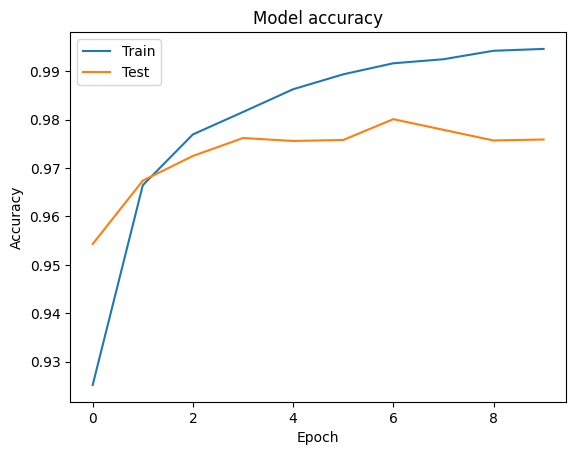

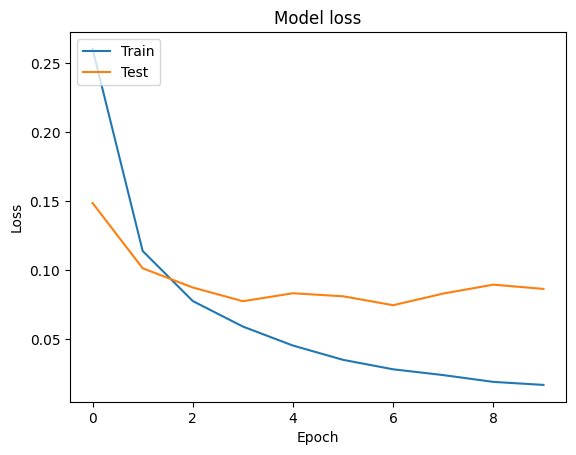

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


313/313 [==============================] - 2s 5ms/step


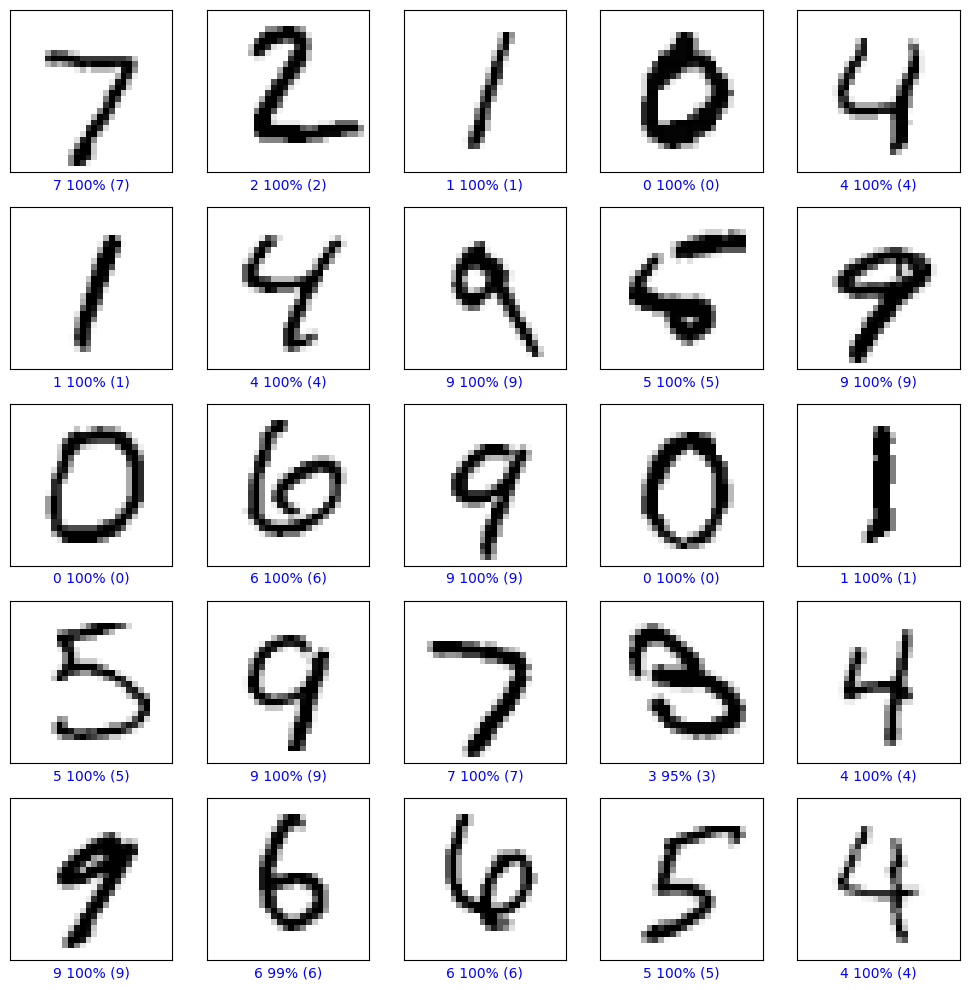

In [ ]:
# Make predictions
predictions = model.predict(x_test)

# Function to plot image with predicted and true label
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

# Plot some test images with predictions
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, predictions, y_test, x_test)
plt.tight_layout()
plt.show()


data augumentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
# Reshape the x_train data to include a channel dimension
x_train_reshaped = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
# Use the generator in the model training
model.fit(datagen.flow(x_train_reshaped, y_train, batch_size=32),
          epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3472 - accuracy: 0.9038 - val_loss: 0.0995 - val_accuracy: 0.9691
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2022 - accuracy: 0.9397 - val_loss: 0.0938 - val_accuracy: 0.9700
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1746 - accuracy: 0.9481 - val_loss: 0.0951 - val_accuracy: 0.9707
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1627 - accuracy: 0.9518 - val_loss: 0.0840 - val_accuracy: 0.9724
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1513 - accuracy: 0.9547 - val_loss: 0.0872 - val_accuracy: 0.9707
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1428 - accuracy: 0.9573 - val_loss: 0.0739 - val_accuracy: 0.9771
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1348 - accuracy: 0.9593 - val_loss: 0.0700 -

In [ ]:
#differt model architecture
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
#regularization
from tensorflow.keras.layers import Dropout

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
#hyperparameter tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
#evalution metrics
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.08      0.02      0.03       980
           1       0.00      0.00      0.00      1135
           2       0.08      0.40      0.13      1032
           3       0.14      0.21      0.17      1010
           4       0.09      0.00      0.01       982
           5       0.13      0.12      0.13       892
           6       0.03      0.01      0.01       958
           7       0.23      0.21      0.22      1028
           8       0.07      0.02      0.03       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.10     10000
   macro avg       0.08      0.10      0.07     10000
weighted avg       0.08      0.10      0.07     10000

